Group Members

Arlo Werner Roos            577441
Nkosinathi Owen Mabena      577732
Justin Gibbon               577407
Mphela Napo                 578379
Morne Bosch                 577323
Maropeng Sebati             578036


Problem Statement

BC Finance is a company that deals in home loans. They have a presence over urban,semi-urban and rural areas.The customer is only allowed to apply for a loan sfter the company has validated the customers eligibility for a loan.

This processs is extremely time consuming, thus they have approached us to automate the loan eligibilty process based on the customer details provided form the application forms.The data made avaiable to us is gender ,marriage status,dependents, education, self employed,income,	coapplicant, Income,loanAmount,loan amount term,credit history and the area in which the property is situated.By using this data we will be creating a machine learning model to automate the loan approval process for BC Finance.

We hypothesis that applicant imcome and credit history would have the largest impact on if a loan get approved or not. Thus we hypothesise that applicants with a low credit rating would most likely not get their loan approved while applicants with a high credit rating would probably get a loan approved.

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('data/train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test = pd.read_csv('data/test.csv')
test.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


We will now create a copy of the data to work on so that the original files do not get contaminated.

In [5]:
train_original=train.copy()
test_original=test.copy()

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We can see from the data above that we have two similar datasets with 12 independant variables and i target variable in the train.csv dataset.

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can now see that we have three different types of data, objects, intigers and floats.

Before we start looking at our data we will handle the missin values

In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

For our missing values we will use the mean to fill numerical values and mode tho fill categorical values.

In [9]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
#using median for loan ammount
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Checking for any remaining null values
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can now repeat this process for the test dataset

In [10]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
#using median for loan ammount
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

# Checking for any remaining null values
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [11]:
train.shape

(614, 13)

In [12]:
test.shape

(367, 12)

In [13]:
train['Loan_Status'].value_counts(normalize=True)


Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: title={'center': 'Loan Approvals'}, ylabel='count'>

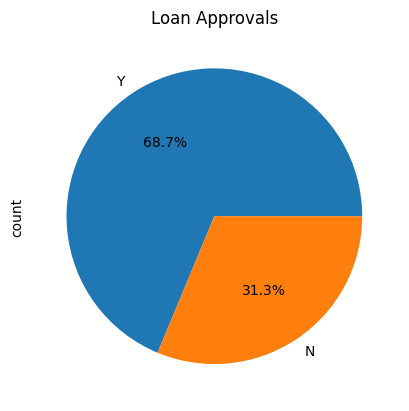

In [14]:
train['Loan_Status'].value_counts().plot.pie(title='Loan Approvals',autopct='%1.1f%%')

For the trainign data we are going to use to train our model we can see that 68.7% of the loans get approved, that is 422 loans that get approved and 192 that get declined.

Categorical Independant Variables

These  variables are categorised into either one or the other. Our dataset has 5 of these namely gender,married, self employed, credit history and loan status( abovementioned).

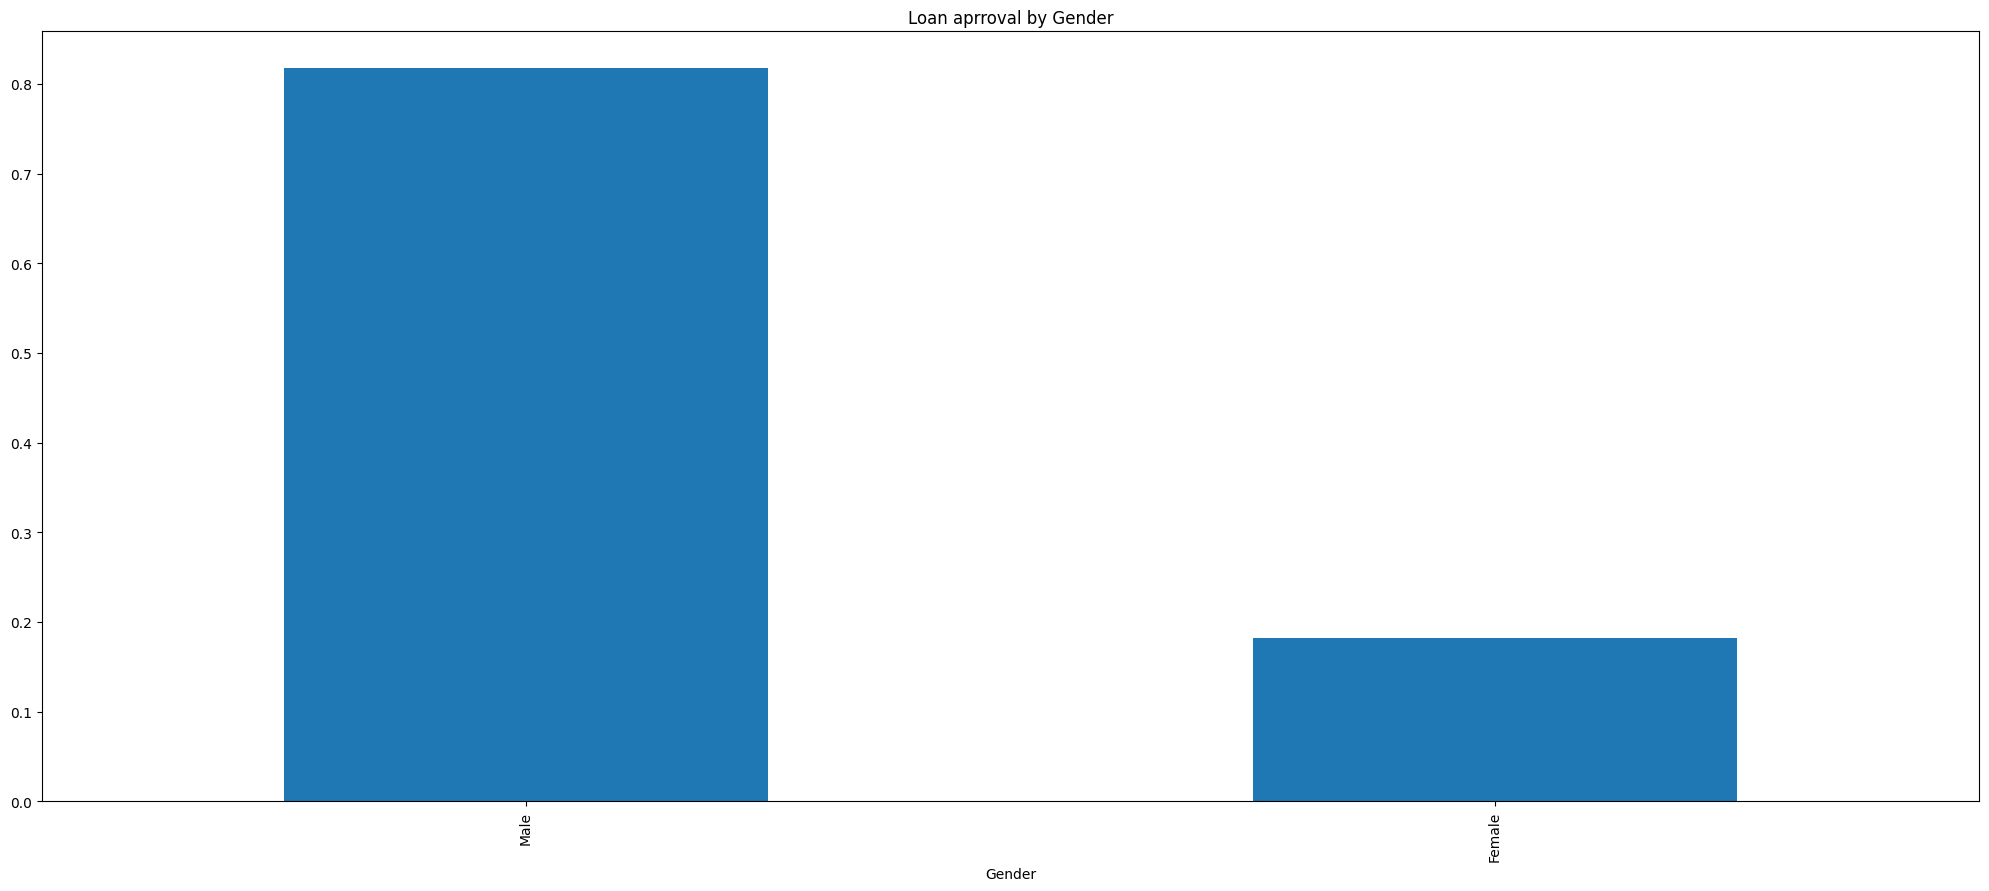

In [15]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(25,10),title='Loan aprroval by Gender',)
plt.show()

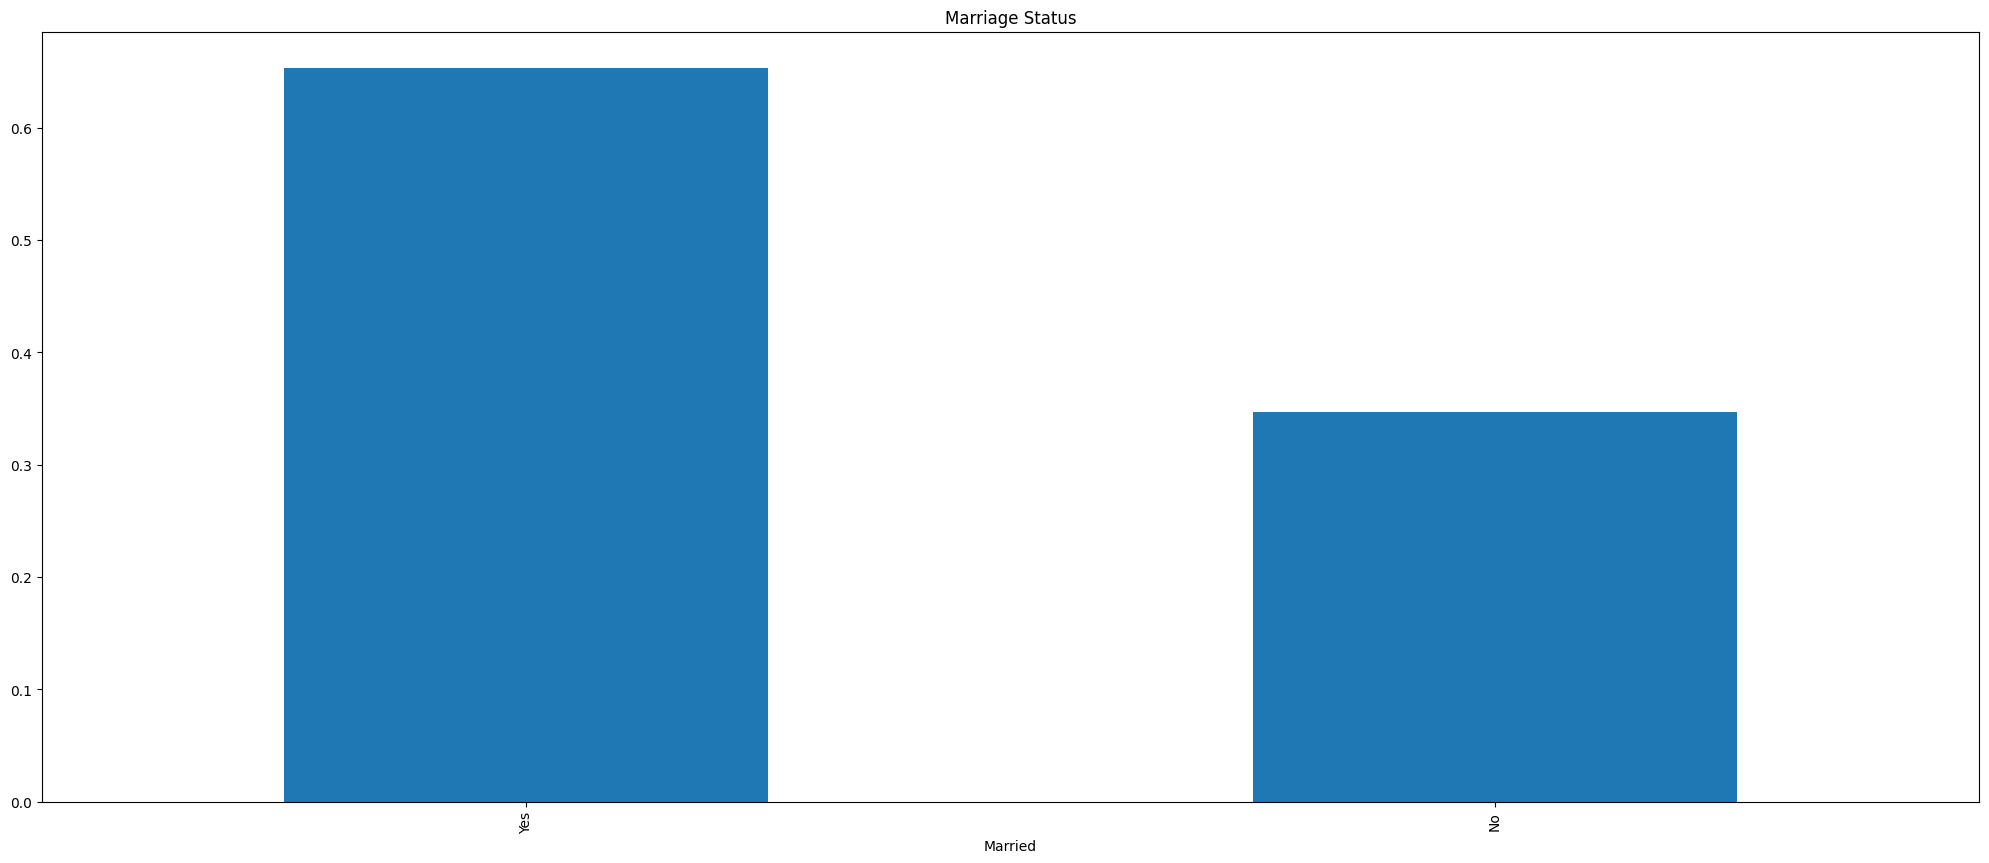

In [16]:
train['Married'].value_counts(normalize=True).plot.bar(figsize=(25,10),title='Marriage Status')
plt.show()

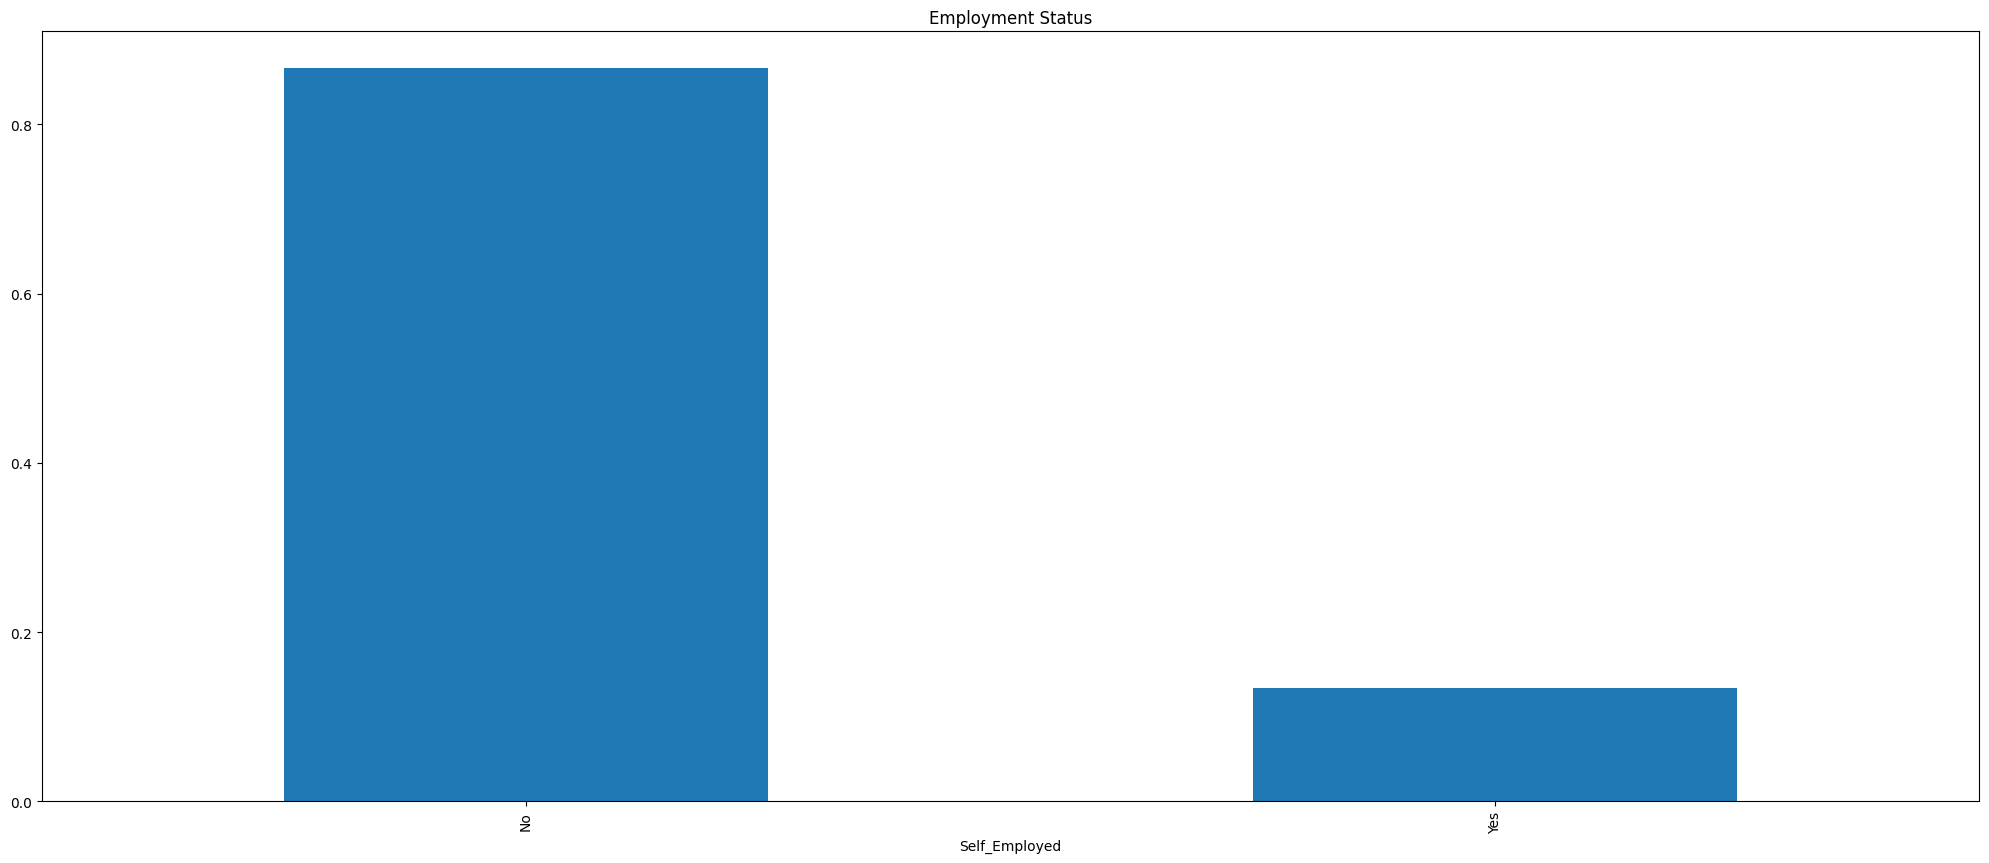

In [17]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(25,10),title='Employment Status')
plt.show()

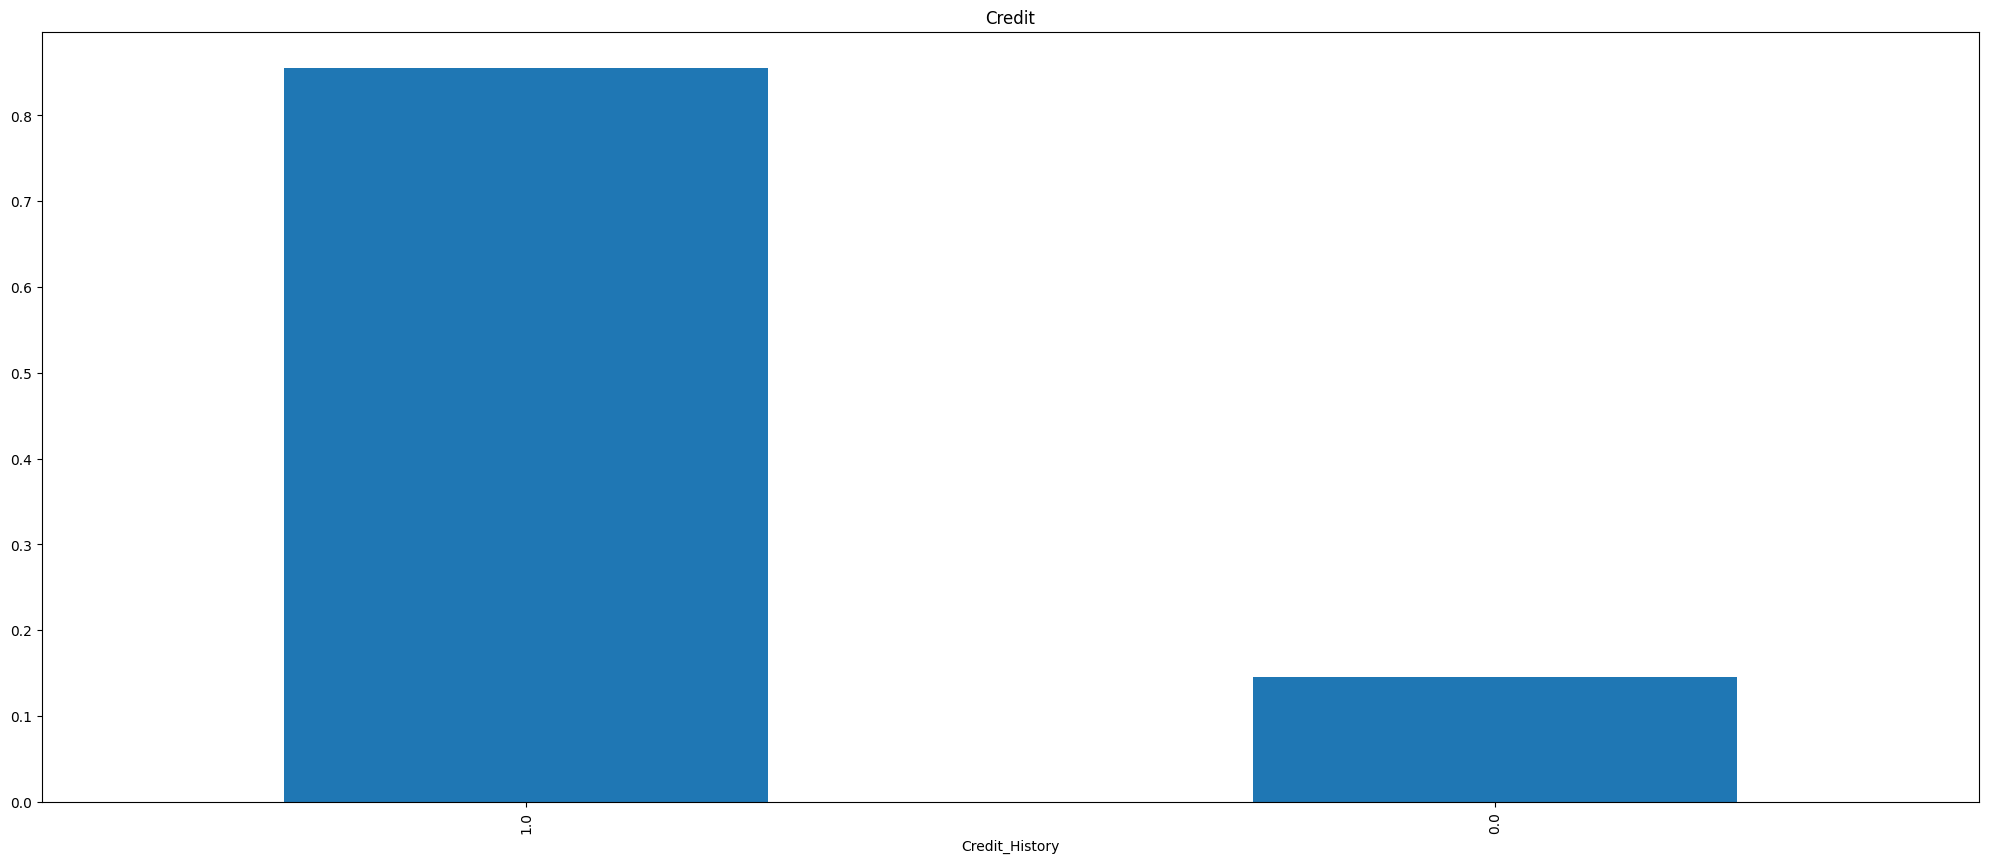

In [18]:
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(25,10),title='Credit')
plt.show()

Discussion of Findings:

Most of the applicants are male
Most of the applicants are married
only about 15% are self employed
Most of the applicants have repaid their previous debts

Ordinal Independant Variables

These are categorical features that have order involved such as dependants,education and property area

<Axes: title={'center': 'Number of dependants'}, xlabel='Dependents'>

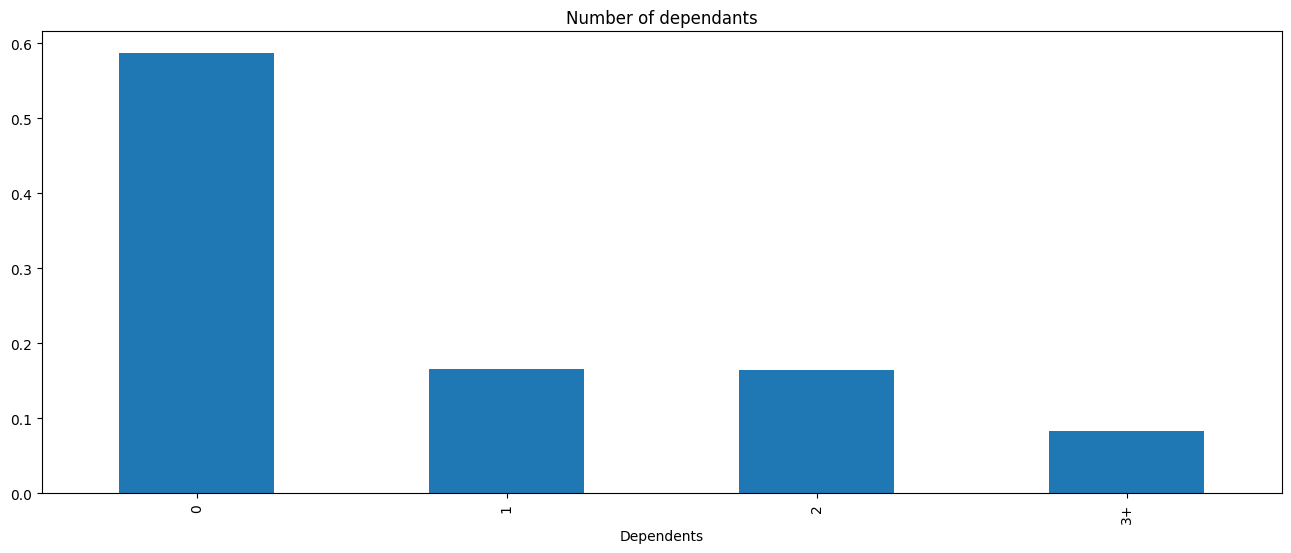

In [19]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(16,6), title='Number of dependants')

<Axes: title={'center': 'Educated or not'}, xlabel='Education'>

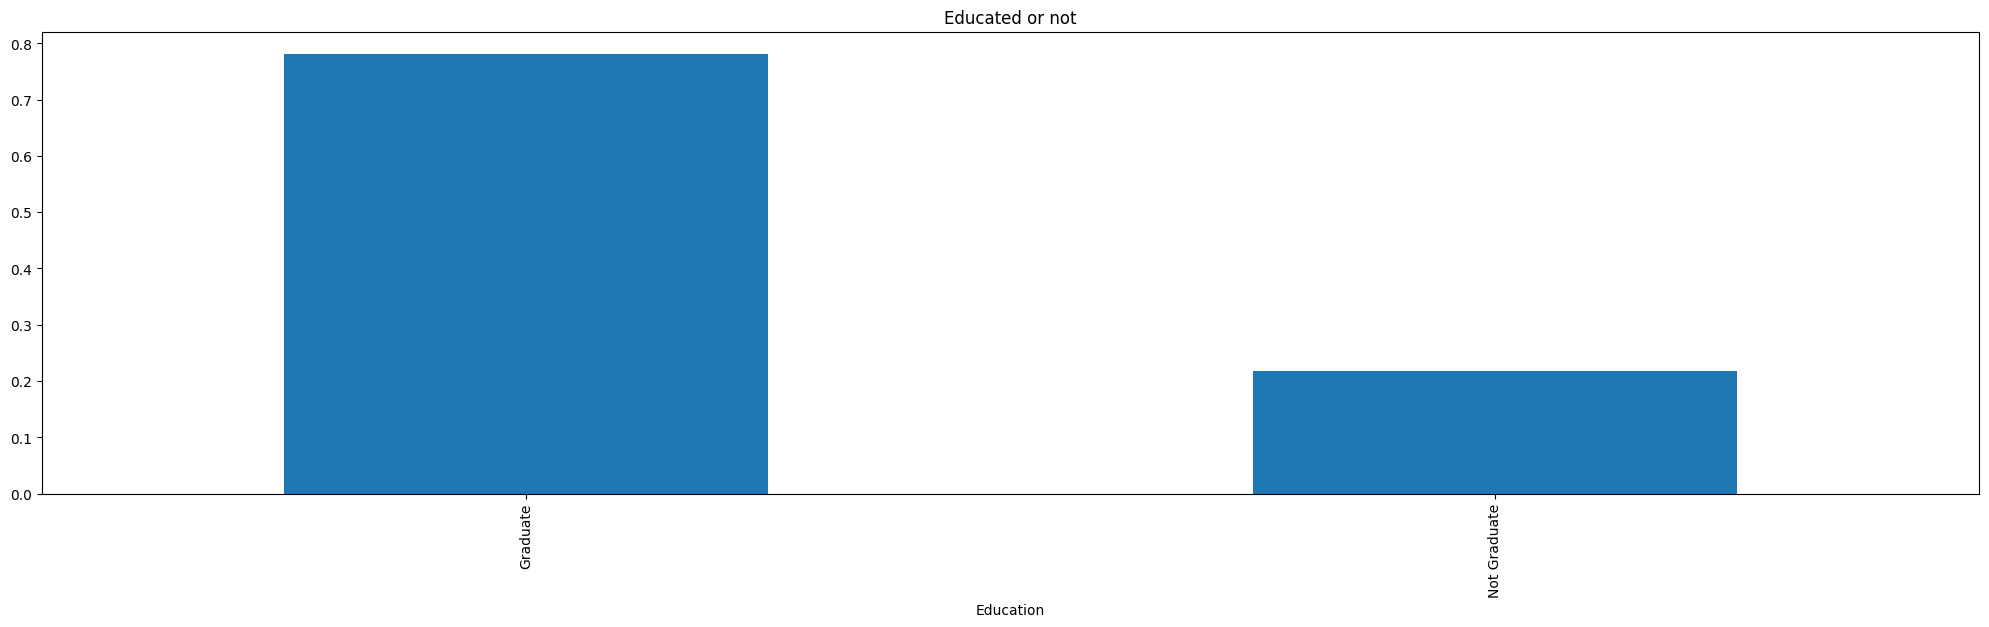

In [20]:
train['Education'].value_counts(normalize=True).plot.bar(figsize=(25,6), title='Educated or not')

<Axes: title={'center': 'Area of property'}, xlabel='Property_Area'>

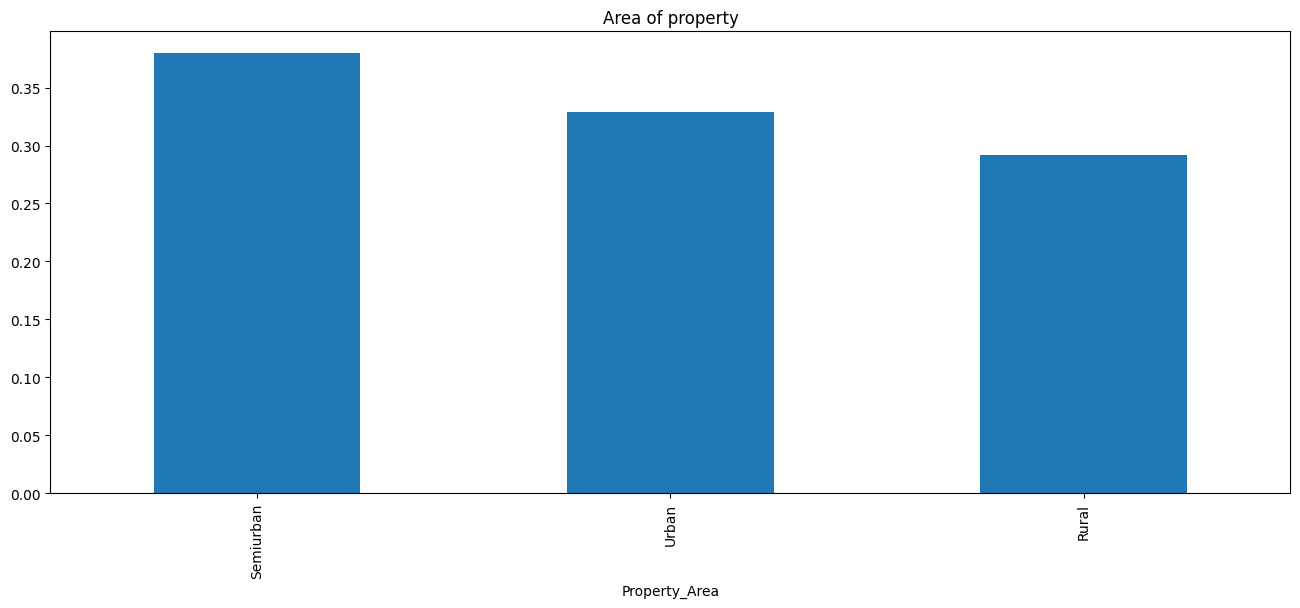

In [21]:
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(16,6), title='Area of property')

Discussion of Findings:

Majority of applicants do not have dependants
Majority of applicants have graduated
Most applicants come from an semi-urban area

Numerical Independant Variables

These are our variables that are numerical namely applicant income, co applicant imcome, loan amount and loan term amount

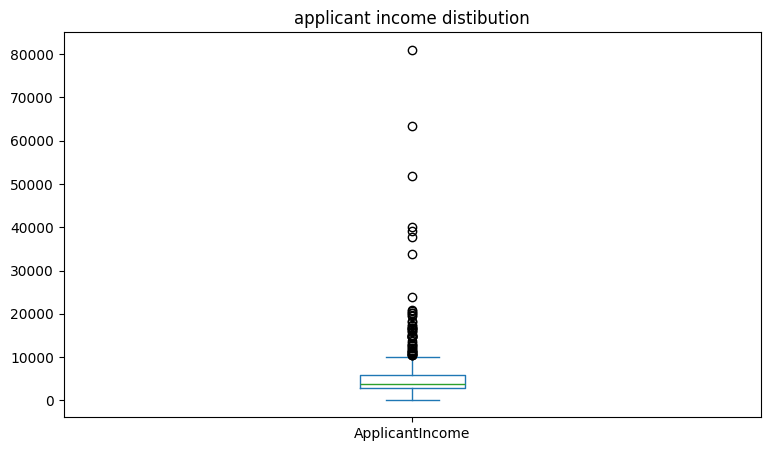

In [22]:
train['ApplicantIncome'].plot.box(figsize=(9,5), title="applicant income distibution")
plt.show()

Discussion of findings

From this we can see that the income is not normally distibuted as it is to the left. The boxplot also reveals extreme outliers.We will try to nornammkt distribute the data later on.
The income may have these many outliers because they are not seperated by education.

Text(0.5, 0.98, '')

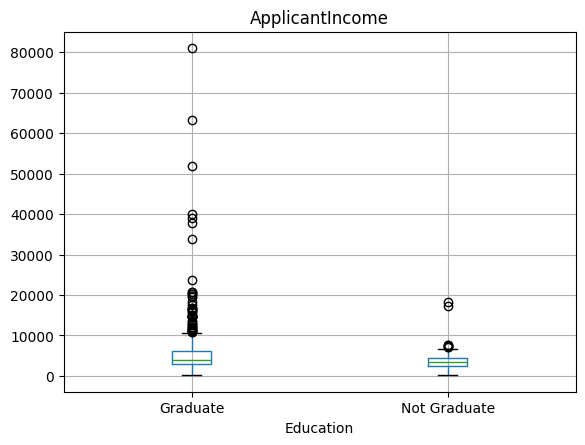

In [23]:

train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle('')

Discussion of findings:
Now that we have seperated them we can see that the grauates have a much hihgher income which leads to all the outliers.

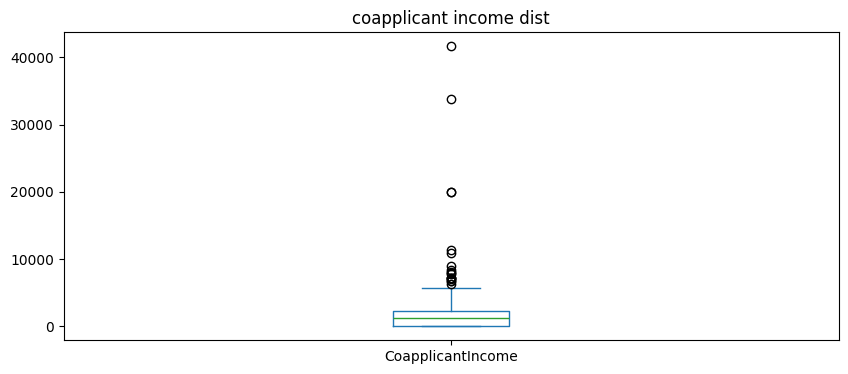

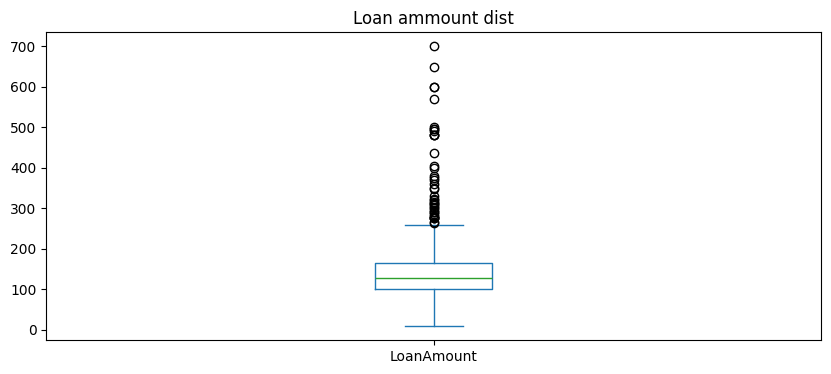

In [24]:
train['CoapplicantIncome'].plot.box(figsize=(10,4),title='coapplicant income dist')
plt.show()
train['LoanAmount'].plot.box(figsize=(10,4),title='Loan ammount dist')
plt.show()

Discussion

We see more outliers in the loan amounts and coapplicant incomes

Bivariative Analysis

From our data we can generate 4 initial hypothesis:

1) Loan amount has a high impact on loan approval, the lesser the amount the more likely the approval
2) Applicants with better credit history would more likely get a loan.
3) Higher incomes would more likely get their loans approved
4) A lower amount per month would more likely be apporved for a loan.

We have looked at all these univariatively now we will look at then in respect to the target variable(Loan_Status)

We will now preform Bivariative analysis on our catergorical values.

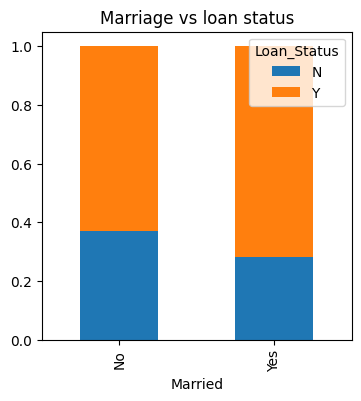

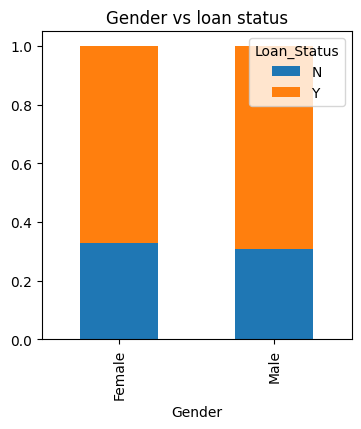

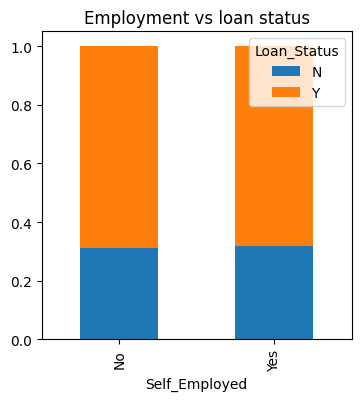

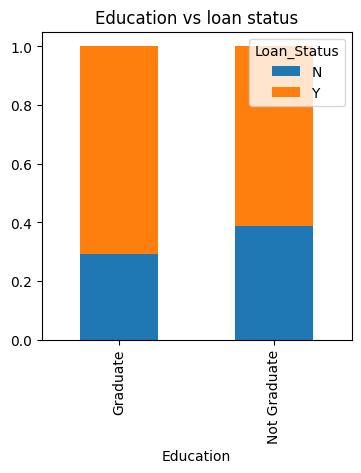

In [25]:
Gender=pd.crosstab(train['Married'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Marriage vs loan status')
plt.show()

Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Gender vs loan status')
plt.show()

Gender=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Employment vs loan status')
plt.show()

Gender=pd.crosstab(train['Education'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Education vs loan status')
plt.show()

From this we can make a few assumptions
1) Marriesd couples are more likely to get approved for loans.
2) Being self employed or not would most likely not impact your chance for a loan
3) Graduates are also more likely to get loan approval

We will now look at the remaining ordinal categorical values.

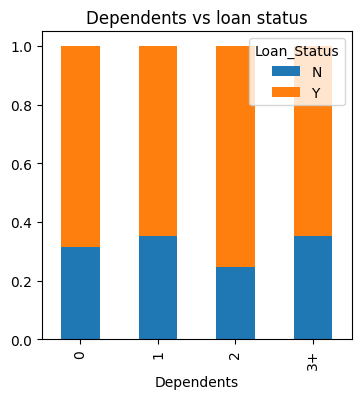

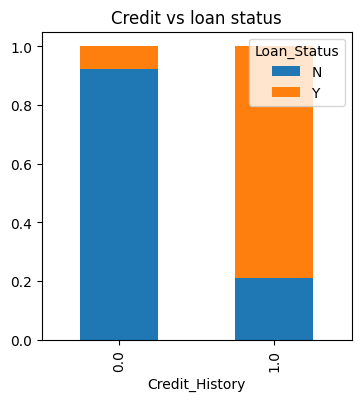

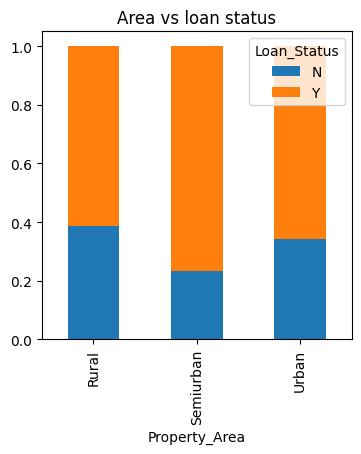

In [26]:
Gender=pd.crosstab(train['Dependents'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Dependents vs loan status')
plt.show()

Gender=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Credit vs loan status')
plt.show()

Gender=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Area vs loan status')
plt.show()

1) Applicants with 1 or 3+ dependents have similar chances of getting a loan
2) Applicants who have a history of not repaying loans most likely will not get 
3) Semi-urban areas are much more likely to get their Loans approved

Numerical Variables

We will now use our numerical variables to preform a bivariative analysis. We will make use of bins to group our numerical data so that it would work better in comparison with the loan status

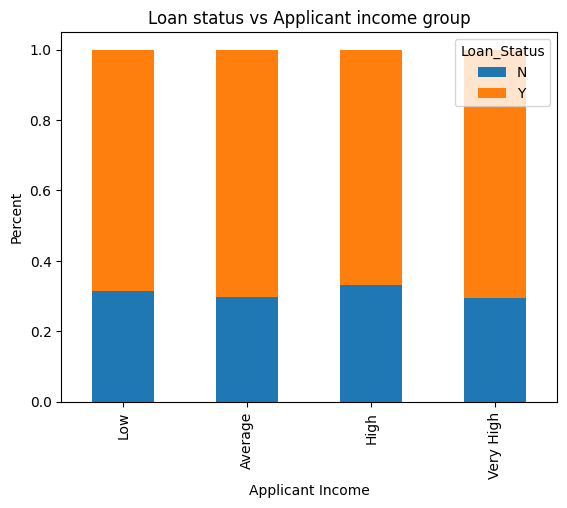

In [27]:
bins=[0,2500,4000,9000,80000]
group=['Low','Average','High','Very High']
train['Income_Bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_Bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Applicant Income')
plt.title('Loan status vs Applicant income group')
P=plt.ylabel('Percent')

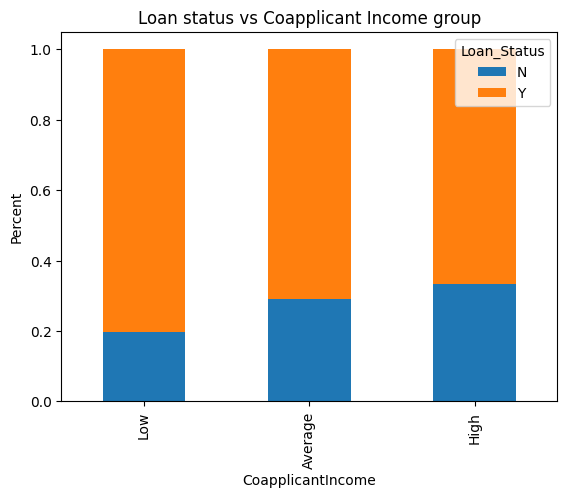

In [28]:
bins=[0,1500,4000,40000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
plt.title('Loan status vs Coapplicant Income group')
P=plt.ylabel('Percent')

From these two income vs loan approval graphs we can infer two thins:
1) Our hypothersis that a higher income would lead to a loan approval is invalid
2) For some reason the Applicants where the coapplicant has a lower income they are more likely to be approved, this would not make financiallly sense so to fix it we will create a total income graph by combining coapplicannt and applicant income.

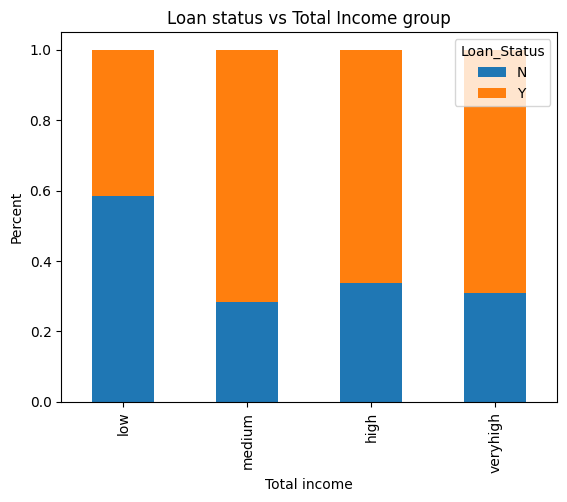

In [29]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,6000,9000,80000]
group=['low','medium','high','veryhigh']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total income')
plt.title('Loan status vs Total Income group')
P=plt.ylabel('Percent')


From this we can see that applicants with medium, high or very high incomes stand a much larger chance to get their loans approved than ones with a low total income.

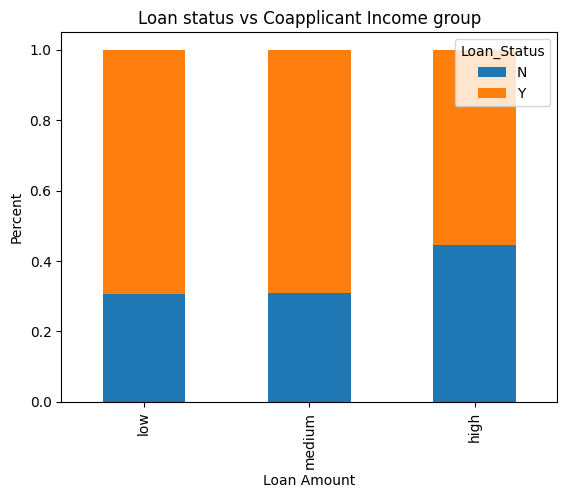

In [30]:
bins=[0,100,300,600]
group=['low','medium','high']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Loan Amount')
plt.title('Loan status vs Coapplicant Income group')
P=plt.ylabel('Percent')

In [31]:
train=train.drop(['Income_Bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)


From our dataanalysis we have found that there are a lot of outliers in the loan amount field and that is was skewed to the left with a longer tail to the right.To fix this right skewness we will preform a log transformation to reduces the arger values while leaving the smaller values largely untouched

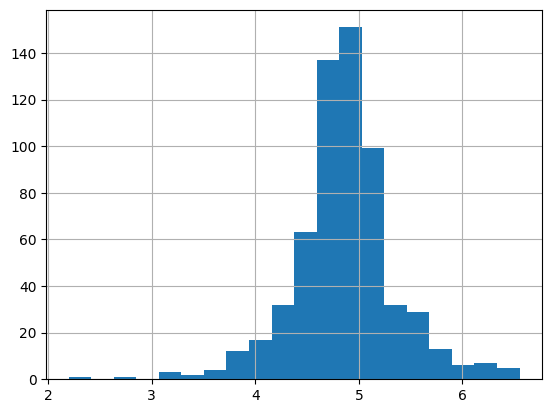

In [32]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

Model Building

We will now create a model to predict the target variable by using logistic regression.To succesfully achieve thus we will be dropping loan id from the train and test data

In [33]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [34]:
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

Creating dummy variables for the categorical values such as gender

In [35]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

c:\Users\Justi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8162162162162162

In [39]:
pred_test = model.predict(test)

As we can see the predictor is able to run the test data and succesfully predict outcomes with an accuracy score of 85.4% when comparing it to the trainign data